# Support Vector Machine (SVM) For Detecting Defective Parts

#### Erin Rasmussen, Kevin Thomas, Mike Wells, Sam Little

This notebook uses the [`scikit-learn`](http://scikit-learn.org/) library to implement a Support Vector Machine (SVM) classifier with various kernels. The SVM classifier is used to detect defective mechanical parts in a manufacturing process. The image data we used is from the ["Casting Product Image Data For Quality Inspection"](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product) dataset, and contains 8646 images used for quality inspection that we used to train the SVM.

First, we import the necessary libraries.

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import shutil
import json
from tqdm.auto import tqdm

We declare global variables below

In [24]:
DATA_PATH = './casting_512x512/casting_512x512/'
OUTPUT_PATH = './out/'
TRAIN_TEST_SPLIT = 0.8
RESIZE_SHAPE = (64, 64)

Load image data

In [25]:
data = []
labels = []
print('Loading OK images...')
for filename in tqdm(os.listdir(f'{DATA_PATH}/ok_front')):
  img = Image.open(f'{DATA_PATH}/ok_front/{filename}')
  img = img.resize(RESIZE_SHAPE)
  img = np.array(img)
  data.append(img)
  labels.append(0)
print('Loading defective images...')
for filename in tqdm(os.listdir(f'{DATA_PATH}/def_front')):
  img = Image.open(f'{DATA_PATH}/def_front/{filename}')
  img = img.resize(RESIZE_SHAPE)
  img = np.array(img)
  data.append(img)
  labels.append(1)

Loading OK images...


  0%|          | 0/519 [00:00<?, ?it/s]

Loading defective images...


  0%|          | 0/781 [00:00<?, ?it/s]

Flatten the images, shuffle them, and split them into training and test sets

In [26]:
data = np.array(data)
data = data / 255.0
data[data == 0] = 0.0001
original_shape = data[0].shape
data = data.reshape(data.shape[0], -1)
shuffled = list(zip(data, labels))

np.random.shuffle(shuffled)
train = shuffled[:int(len(shuffled) * TRAIN_TEST_SPLIT)]
test = shuffled[int(len(shuffled) * TRAIN_TEST_SPLIT):]

train_data = np.array([i[0] for i in train])
train_labels = np.array([i[1] for i in train])
test_data = np.array([i[0] for i in test])
test_labels = np.array([i[1] for i in test])

In [33]:
print(f'Train data shape: {train_data.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Test labels shape: {test_labels.shape}')
print(f'Defective to OK ratio: {sum(train_labels) / len(train_labels)}')

Train data shape: (1040, 12288)
Train labels shape: (1040,)
Test data shape: (260, 12288)
Test labels shape: (260,)
Defective to OK ratio: 0.5980769230769231


Show a random image to make sure everything is working and retain sanity

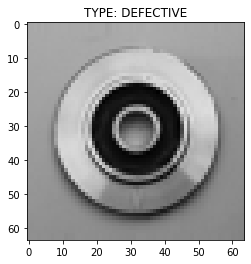

In [34]:
random_image = np.random.randint(0, len(train_data))
image = train_data[random_image].reshape(original_shape)
plt.imshow(image)
label = train_labels[random_image]
type = 'OK' if label == 0 else 'DEFECTIVE'
plt.title(f'TYPE: {type}')
plt.show()

Declare kernels we wish to test, and feed each into an `sklearn` SVM, fitting it to the training data. Accuracy, confusion matrices, and other metrics are generated for each kernel.

In [35]:
kernels_to_test = [
  'linear',
  'poly',
  'rbf',
  'sigmoid',
]

results = {}

for kernel in kernels_to_test:
  print(f'Testing kernel: {kernel}')
  svm = SVC(kernel=kernel, gamma='auto', verbose=True)
  svm.fit(train_data, train_labels)
  predictions = svm.predict(test_data)
  accuracy = accuracy_score(test_labels, predictions)
  conf_matrix = confusion_matrix(test_labels, predictions)
  report = classification_report(test_labels, predictions)
  results[kernel] = {
    'accuracy': accuracy,
    'confusion_matrix': conf_matrix,
    'classification_report': report
  }

Testing kernel: linear
[LibSVM]...............*........*
optimization finished, #iter = 23020
obj = -21.004910, rho = 9.412743
nSV = 372, nBSV = 0
Total nSV = 372
Testing kernel: poly
[LibSVM]........*...*
optimization finished, #iter = 11437
obj = -44.638936, rho = 2.224071
nSV = 420, nBSV = 3
Total nSV = 420
Testing kernel: rbf
[LibSVM]*
optimization finished, #iter = 688
obj = -395.067402, rho = 0.587923
nSV = 581, nBSV = 430
Total nSV = 581
Testing kernel: sigmoid
[LibSVM]*
optimization finished, #iter = 555
obj = -837.357331, rho = 1.007191
nSV = 836, nBSV = 836
Total nSV = 836


/home/sam/.miniconda3/envs/ml-group-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/.miniconda3/envs/ml-group-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sam/.miniconda3/envs/ml-group-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

For each kernel, we save the confusion matrix, accuracy, and other metrics to the output directory.

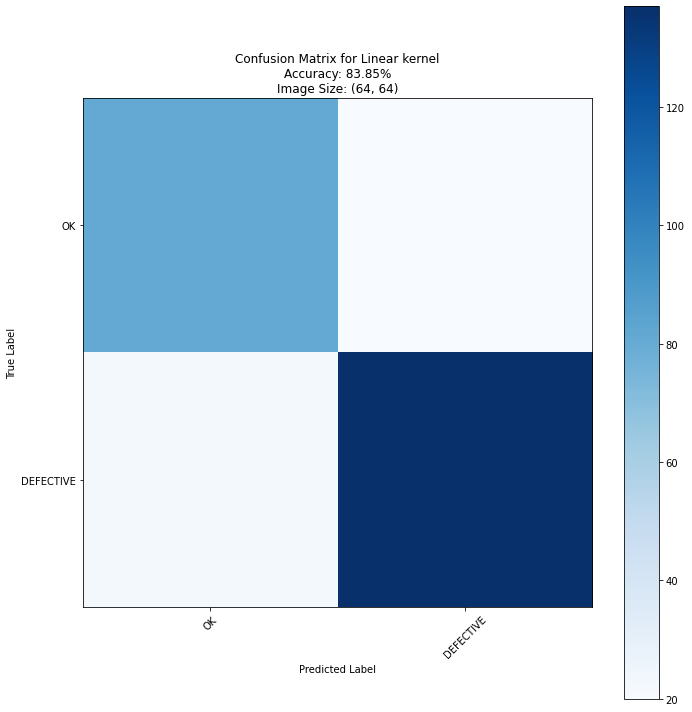

Accuracy for linear kernel: 0.8384615384615385
Classification report for linear kernel:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       101
           1       0.87      0.86      0.87       159

    accuracy                           0.84       260
   macro avg       0.83      0.83      0.83       260
weighted avg       0.84      0.84      0.84       260



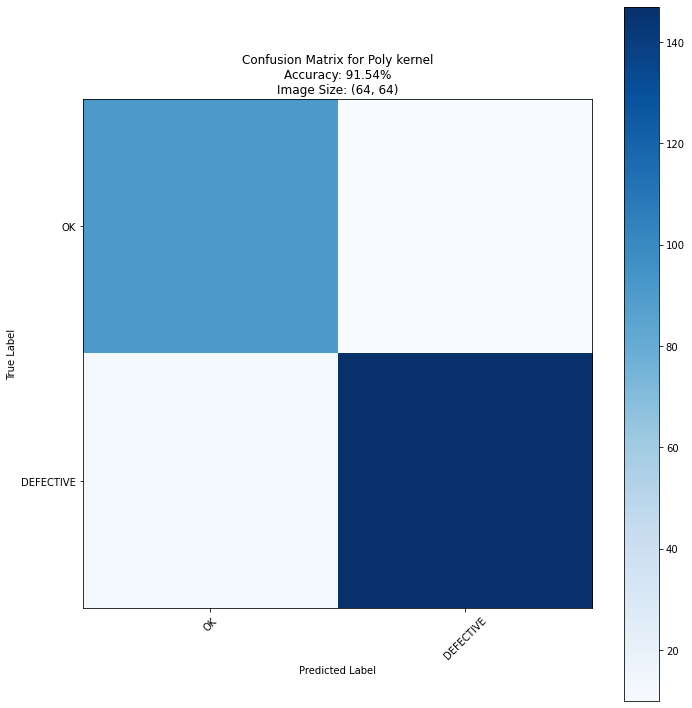

Accuracy for poly kernel: 0.9153846153846154
Classification report for poly kernel:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       101
           1       0.94      0.92      0.93       159

    accuracy                           0.92       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.92      0.92      0.92       260



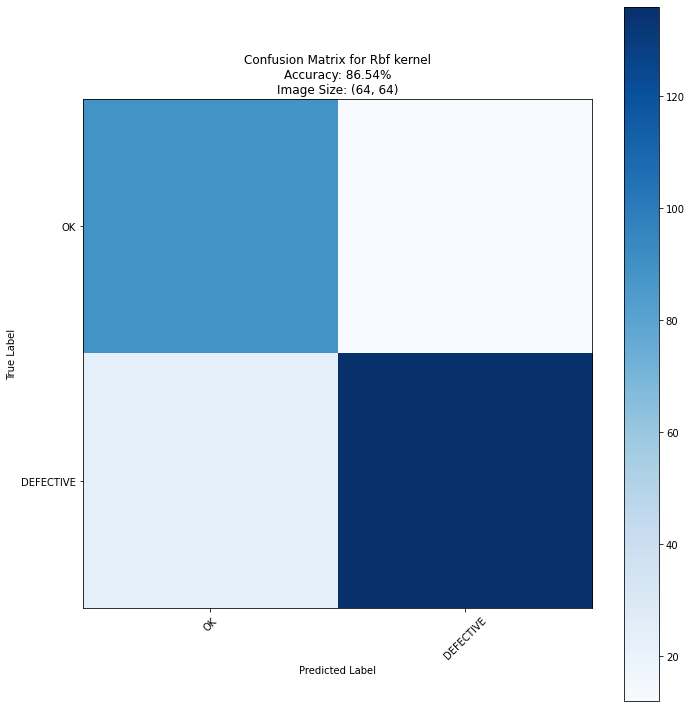

Accuracy for rbf kernel: 0.8653846153846154
Classification report for rbf kernel:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       101
           1       0.92      0.86      0.89       159

    accuracy                           0.87       260
   macro avg       0.86      0.87      0.86       260
weighted avg       0.87      0.87      0.87       260



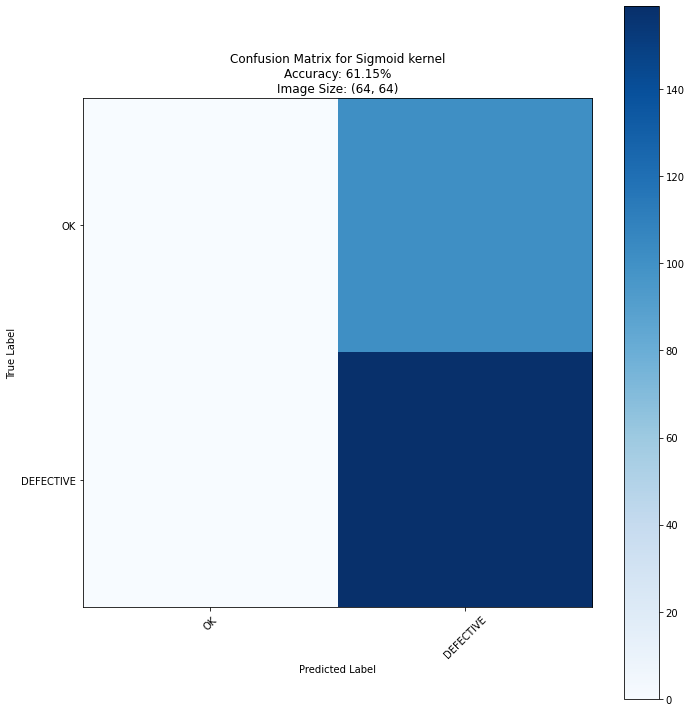

Accuracy for sigmoid kernel: 0.6115384615384616
Classification report for sigmoid kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.61      1.00      0.76       159

    accuracy                           0.61       260
   macro avg       0.31      0.50      0.38       260
weighted avg       0.37      0.61      0.46       260



In [32]:
for kernel, result in results.items():

  # if path doesn't exist, create it
  if not os.path.exists(f'{OUTPUT_PATH}{kernel}'):
    os.makedirs(f'{OUTPUT_PATH}{kernel}')

  # save confusion matrix
  plt.figure(figsize=(10, 10))
  plt.imshow(result['confusion_matrix'], interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for {kernel.capitalize()} kernel\nAccuracy: {result["accuracy"] * 100:.2f}%\nImage Size: {RESIZE_SHAPE}')
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, ['OK', 'DEFECTIVE'], rotation=45)
  plt.yticks(tick_marks, ['OK', 'DEFECTIVE'])
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.savefig(f'{OUTPUT_PATH}{kernel}/confusion_matrix.png')
  plt.show()

  print(f'Accuracy for {kernel} kernel: {result["accuracy"]}')
  print(f'Classification report for {kernel} kernel:')
  print(result['classification_report'])

  # save results to JSON
  with open(f'{OUTPUT_PATH}{kernel}/results.json', 'w') as f:
    result = {
      'accuracy': result['accuracy'],
      'size': RESIZE_SHAPE,
      'confusion_matrix': result['confusion_matrix'].tolist(),
      'classification_report': result['classification_report']
    }
    json.dump(result, f)